---
title: "Derivatives I"
format: 
  html:
    toc: true
    code-fold: false
    page-layout: full
    fig-cap-location: bottom
    number-sections: true
    number-depth: 2
jupyter: python3
---

# Motivation
## Example from Physics
We use derivatives everywhere in physics, for example:

- In classical mechanics, the _velocity_ of a single particle is:
$$
\boldsymbol{v} = \frac{d\boldsymbol{r}}{dt}
$$
where $\boldsymbol{r}$ is the position of the particle in a given reference frame. 

- In classical electromagnetism, the equation connecting the electric field $\boldsymbol{E}$ with the vector potential $\boldsymbol{A}$ and scalar potential $\phi$ is:
$$
\boldsymbol{E} = -\nabla \phi  - \frac{\partial A}{\partial t}.
$$

- The Lagrangian density for the vibrations of a continuous rod can be expressed as 
$$
\mathcal{L}  = \frac{1}{2}\left[\frac{1}{c^2}
\left(\frac{\partial \varphi}{\partial t}\right)^2 
-\left(\frac{\partial \varphi}{\partial x}\right)^2\right].
$$
Here $c$ is the velocity of longitudinal elastic waves. The dynamical variable is $\varphi(x,t)$.
As you can see, the spatial and temporal derivatives of this quantity together make up the Lagrangian density. 

## The Problem to be Solved
- Generally, our task is to evaluate the derivative of $f(x)$ at a specific point, $f'(x)$. 
- If $f'(x)$ can be evaluated analytically, then this problem is trivial.
- However, in lots of cases, either $f(x)$ has a very complicated expression, or we only know the numerical values of $f(x)$ at a few points, namely, we have a table of the form
$(x_i, f(x_i))$ for $i = 0, 1, \dots, n-1$.

We could approach this problem in a number of ways: 

- We can use interpolation or data fitting to produce a new function that approximates the data reasonably well, and then apply _analytical differentiation_ to that function. This is helpful for noisy data. On the other hand, the approxixmation may not be able to capture the derivatives.
- The second approach is the _finite-difference_ approach, also known as _numerical dfferentiation_. This makes use of the Taylor series expansion.
- The third approach is the _automatic differentiation_: this is as accurate as analytical differentiation, but it deals with numbers instead of mathematical expression.

# Analytical Differentiation
Derivatives are defined as
$$
\frac{d f(x)}{dx} = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}
$$

You can calculate the analytical expressions by hand, based on the chain rulles etc. Alternatively, you can also use a _computer algebra system (CAS)_. There are commercial softwares: `Mathematica` and `Maple`. There are also free options. One such example is `Sage`, which is a mathematical software system with a "Python-like" syntax. 
In one of the problems, we focus on a much more lightweight solution, namely `SymPy` (actually included as part of `Sage`): this is a Python module (that can be used like any other Python module) to carry out symbolic manipulations using Python idioms whenever possible.

#  Finite Differences
Let us rewrite the definition of the derivative
$$
\left.\frac{d f(x)}{dx}\right|_{x=\tilde{x}} = \lim_{h \to 0} \frac{f(\tilde{x} + h) - f(\tilde{x})}{h}
$$
where we are slightly changing our notation to show that this definition allows us to evaluate the derivative of $f(x)$ at point $\tilde{x}$.

Numerically, one can apply this formula without taking the limit, but take $h$ to be "small". But there are many questions that emerge with this approach.

1. do we have any understanding of the errors ?
   
2. do we know what "small" means ?
   
3. do we realize that the smaller $h$ becomes, the smaller the numerator becomes? Namely, as $h$ becomes smaller and smaller, both numerator and denominator become smaller.
Any errors appearing in the calculation of the numerator will then be magnified.

## Noncentral-Difference Approximations
### Forward Difference
Recall the Taylor expansion of $f(x+h)$ around $x$:
$$
f(x+h) = f(x) + h f'(x) + \frac{h^2}{2}f''(x) + \frac{h^3}{3!}f'''(x) + \cdots,
$$
which can be re-arranged into
$$
f'(x) = \frac{f(x+h) - f(x)}{h} - \frac{h}{2}f''(x) + \cdots.
$$
This leads to 
$$
f'(x) =\frac{f(x+h) - f(x)}{h} + O(h),
$$
known as the _(first) forward-difference approximation_, which has an error $O(h)$. 
Graphically, this is just the slope of the line segment connecting $f(x)$ and $f(x+h)$, see left of @fig-finite_difference.

![First approximation of a first derivative: forward (left), central (right)](finite_difference.png){#fig-finite_difference}

### Backward Difference
We can also perform a Taylor expansion of $f(x-h)$ near $f(x)$. This will lead to
$$
f'(x) =\frac{f(x) - f(x-h)}{h} + O(h),
$$
known as the _(first) backward-difference approximation_.

### Error Analysis for the Forward Difference
There are two errors involved in this problem (we use $\mathcal{E}$ to denote the magnitude of the absolute error):

1. the approximation error $\mathcal{E}_{app}$, coming from the truncation of the Taylor series.

2. the roundoff error $\mathcal{E}_{ro}$, coming from the subtraction and division involved in the definition of the forward difference.

Here, the approximation error is $\mathcal{E}_{app} = \frac{h}{2} |f''(x)|$.

Turning to $\mathcal{E}_{ro}$, where we are interested in computing
$[f(x+h)-f(x)]/h$. We focus on the numerator: we are subtracting two numbers that are very close to each other. The absolute error for the numerator is $f(x)2\epsilon_m$, where we approximate $f(x+h)\simeq f(x)$ and we assume the relative error for each function is the machine error $\epsilon_m = 2.2 \times 10^{-16}$. If we now ignore the error in the denominator, we can write 
$$
\mathcal{E}_{ro} = \frac{2|f(x)|\epsilon_m}{h}.
$$

We can write the total absolute error 
$$
\mathcal{E} = \mathcal{E}_{app} + \mathcal{E}_{ro}
 = \frac{h}{2}|f''(x)| + \frac{2|f(x)|\epsilon_m}{h}.
$${#eq-total-error}

We see that $\mathcal{E}_{app}$ decreases as $h$ is decreased. On the other hand, $\mathcal{E}_{ro}$ increases as $h$ is decreased.

To minimize the total error, take the derivative with respect to $h$ and then set it to zero, we find
$$
\frac{1}{2}|f''(x)| - \frac{2|f(x)|\epsilon_m}{h_{opt}^2} = 0.
$$
This gives the optimal $h = h_{opt}$, with
$$
h_{opt} = \sqrt{ 4\epsilon_m \left|\frac{f(x)}{f''(x)} \right| }.
$${#eq-opt-cond}

By @eq-total-error, we have that the optimal (minimum) error is
$$
\mathcal{E}_{opt} = \frac{h_{opt}}{2}|f''(x)| + \frac{2|f(x)|\epsilon_m}{h_opt} = 
h_{opt}|f''(x)|,
$$
where in the second equality we have used @eq-opt-cond. This finally gives
$$
\mathcal{E}_{opt} = \sqrt{4\epsilon_m|f(x) f''(x)|}.
$$

For concreteness, assuming that $f(x)$ and $f''(x)$ are of order 1, we can obtain
that $h_{opt} = \sqrt{4\epsilon_m} \simeq 3 \times 10^{-8}$, and $\mathcal{E}_{opt} \simeq 3\times 10^{-8}$.

Note that $10^{-8}$ error is not impressive. In analytical differentiation, the only error comes from function evaluation, which is a less important problem. 

Another remark here is that the error analysis is on well behaved functions. The point of function evaluations should be away from singularties. 

## Central-Difference Approximation
Consider Taylor expansion of $f(x\pm\frac{h}{2})$:
$$
f(x \pm \frac{h}{2}) = f(x) \pm \frac{h}{2}f'(x) + \frac{h^2}{8}f''(x) \pm 
\frac{h^3}{48} f'''(x) + \cdots.
$$
If we evaluate $f(x+\frac{h}{2}) - f(x - \frac{h}{2})$, we see that the $f''(x)$ term get cancelled out. In fact, all even order of derivatives cancel out. Thus, we have
$$
f'(x) = \frac{f(x + \frac{h}{2}) - f(x - \frac{h}{2})}{h} - \frac{h^2}{24}f'''(x)+ \cdots,
$$
this leads to 
$$
f'(x) = \frac{f(x + \frac{h}{2}) - f(x - \frac{h}{2})}{h}  + O(h^2),
$$
known as the _(first) central difference approximation_. Note that the error is of second order of the small number $h$. This is graphically illustrated in @fig-finite_difference.

There exists one (very common in practice) situation where a central-difference approximation is simply not usable: : if we have a set of $n$ discrete data points of the form $(x_i, f(x_i))$ for $i = 0,1,\dots,n-1$, we will not be able to use a central difference to approximate the derivative at $x_0$ or at $x_{n-1}$. So at the boundary points we have to use forward/backward difference method.

### Error Analysis for the Central Difference
Similar to the error analysis in the forward case, the total error (see homework problem) here is
$$
\mathcal{E} = \mathcal{E}_{app} + \mathcal{E}_{ro} 
= \frac{h^2}{24}|f'''(x)| + \frac{2|f(x)|\epsilon_m}{h}.
$$

You will also show that
$$
h_{opt} = \left(24 \epsilon_m \left|\frac{f(x)}{f'''(x)}\right|\right)^{1/3},
$$
and 
$$
\mathcal{E}_{opt} = \left(\frac{9}{8}\epsilon_m^2[f(x)]^2\left|f'''(x)\right|\right)^{1/3}.
$$
Taking $f(x)$ and $f'''(x)$ of order 1, we can estimate $h_{opt} \simeq 2 \times 10^{-5}$ and $\mathcal{E}_{opt}\simeq 4 \times 10^{-11}$. We see the improvements compared with the errors in forward difference. 

## Implementation
Let us work on a concrete function $f(x) = e^{\sin(2x)}$. We can analytically compute its derivative
$$
f'(x) = 2\cos(2x)e^{\sin(2x)}.
$$
The following program will compute the derivate of $f(x)$ at $x = 0.5$, using finite difference. 

In [1]:
from math import exp, sin, cos, log10

def f(x):
    return exp(sin(2*x))

def fprime(x):
    return 2*exp(sin(2*x))*cos(2*x)

def calc_fd(f,x,h):
    fd = (f(x+h) - f(x))/h
    return fd

def calc_cd(f,x,h):
    cd = (f(x+h/2) - f(x-h/2))/h
    return cd

if __name__ == '__main__':
    x = 0.5
    an = fprime(x)

    hs = [10**(-i) for i in range(1,12)]
    fds = [abs(calc_fd(f,x,h) - an) for h in hs]
    cds = [abs(calc_cd(f,x,h) - an) for h in hs]

    rowf = "{0:1.0e} {1:1.16f} {2:1.16f}"
    print("h     abs. error in fd   abs. error in cd")
    for h,fd,cd in zip(hs,fds,cds):
        print(rowf.format(h,fd,cd))

h     abs. error in fd   abs. error in cd
1e-01 0.3077044583376249 0.0134656094697734
1e-02 0.0260359156900742 0.0001350472493096
1e-03 0.0025550421497806 0.0000013505120728
1e-04 0.0002550180941236 0.0000000135077878
1e-05 0.0000254969542519 0.0000000001495843
1e-06 0.0000025492660578 0.0000000002500959
1e-07 0.0000002564334673 0.0000000011382744
1e-08 0.0000000189018428 0.0000000189018428
1e-09 0.0000003741732106 0.0000000699159992
1e-10 0.0000021505300500 0.0000021505300500
1e-11 0.0000332367747395 0.0000111721462455


We can plot the error as a function of $h$, using `matplotlib`, with `plt.loglog(x,y)`, which plots the data in the log-log scale. 

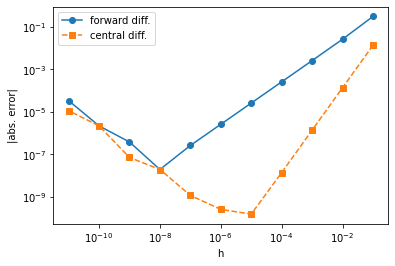

In [14]:
import matplotlib.pyplot as plt
plt.loglog(hs,fds,'o-',label='forward diff.')
plt.loglog(hs,cds,'s--',label='central diff.')
plt.xlabel('h')
plt.ylabel('|abs. error|')
plt.legend()
plt.show()

## More Accurate Finite Differences
In the previous section, we have derived the forward and central finite difference approximations, which require two function evaluations.

As you will show in your homework, one can produce the following approximation for the value of the derivative of $f(x)$ at x:
$$
f'(x) = \frac{4f(x+\frac{h}{2}) - f(x+h) - 3f(x)}{h} + \frac{h^2}{12}f'''(x) + \cdots 
$$
known as the _second forward-difference approximation_.
This gives an error $O(h^2)$, at the cost of requiring three function evaluations:
$f(x)$, $f(x+h/2)$, and $f(x+h)$.

You can also show that
$$
f'(x) = \frac{27f(x+\frac{h}{2}) + f(x - \frac{3}{2}h) - 27 f(x-\frac{h}{2}) - f(x+\frac{3}{2}h)}{24h} + \frac{3}{640}h^4f^{(5)}(x) + \cdots,
$$ 
known as the _second central-difference approximation_. This has an error of $O(h^4)$, at the cost of requiring four function evaluations: $f(x+3h/2)$, $f(x+h/2)$, $f(x-h/2)$ and $f(x - 3h/2)$. 

One observation is that the sum of coefficients in the finite-difference formula is zero: $27 + 1 - 27 -1 = 0$ in the above case. 

This can be generalized by incorporating more points in order to obtain a better approximation. 

## Second Derivative

Second order derivatives are also very important in physics. We can compute it numerically once we have first derivatives, via, for example
$$
f''(x)  = \frac{f'(x+\frac{h}{2}) - f'(x - \frac{h}{2})}{h} + O(h^2).
$$

This can also be derived by adding $f(x+h/2)$ and $f(x - h/2)$,
$$
f(x+h/2) + f(x - h/2) = 2f(x) + \frac{h^2}{4}f''(x) + \frac{h^4}{192}f^{(4)}(x)
+ \cdots .
$$
This can be re-arranged into te form
$$
\begin{align*}
f''(x) &= 4\frac{f(x + h/2) +f(x-h/2) - 2f(x)}{h^2} - \frac{h^2}{48}f^{(4)}(x) + \cdots \\
&=4\frac{f(x + h/2) +f(x-h/2) - 2f(x)}{h^2} + O(h^2),
\end{align*}
$$
which is known as the _(first) central-difference approximation_ to the second derivative. 

Higher order of derivatives can also be derived in a similar fashion based on Taylor expansion, although this is not too common in physics. 


## Points on a Grid
So far, we have assume that we can evaluate the function at any points of $x$, in order to compute the derivatives. This does not happen sometimes in practice. Instead, in those cases we have access only to a set of $n$ discrete data points, $(x_i, f(x_i))$ for $i = 0,1,\dots, n-1$.

### Avoiding Error Creep
A very common use case is when the points $x_i$ are on an equally spaced grid (also known as a mesh), from $a$ to $b$. The $n$ points are then given by the following relation:
$$
x_i = a + ih,
$$
where $i = 0,\dots,n-1$ and 
$$
h = \frac{b - a}{n-1}.
$$

In python, you can store $x_i$ into a list `xs = [a + i*h for i in range(n)]`. Note that `range(n)` automatically ensures that $i$ goes from $0$ to $n-1$.

Someone may think to take an alternative approach by considering a running `x`, and update `x` via `x += h` every time. This has a drawback because when every time you update $x$, you introduce an error in $h$ and the error will accumulate, which can be a problem when you have thousands of points. This issue is known as "_systematic creep_". Instead, if you update the `x` via `x = a + i*h`, you can avoid systematic creep because every time `x` is obtained by two operations: multiplication and addition. 

### Finite-Difference Formulas
Now let us calculate the first derivative of $f(x)$ at the points $x_i$. To be concrete, we have 101 points from 0 to 5. This leads to a step size of $h = 0.05$: $0, 0.05, 0.1, 0.15, \dots, 5.0$. For example, we are interested in $f'(3.7)$
but the neighboring values at our disposal are only $f(3.65)$, $f(3.7)$, and $f(3.75)$.

We can use the forward difference formula
$$
f'(3.7) = \frac{f(3.75) - f(3.7)}{h} + O(h).
$$

However, things are not so simple for the case of of central-difference formula, which requires $f(3.675)$ and $f(3.725)$. 

What we can do instead, is to double $h$, by choosing $h = 0.1$, then we only need $f(3.65)$, and $f(3.75)$, with the modified formula
$$
f'(x) = \frac{f(x+h) - f(x-h)}{2h} + O(h^2).
$$
With this "doubling" trick, one can also compute the second order derivative via
$$
f''(x) = \frac{f(x+h) + f(x - h) - 2f(x)}{h^2} + O(h^2).
$$

The error for the first central-difference first derivative with $h\to 2h$ is then
$$
\mathcal{E} = \mathcal{E}_{app} + \mathcal{E}_{ro} = \frac{h^2}{6}|f'''(x)| + 
\frac{|f(x)|\epsilon_m}{h}.
$$
You can see that it still has an error $O(h^2)$. It is safe to say central-difference is better than the forward-difference in most cases. 

# Homework
1. Show that total error of the central-difference for the first derivative is
$$
\mathcal{E} = \mathcal{E}_{app} + \mathcal{E}_{ro} 
= \frac{h^2}{24}|f'''(x)| + \frac{2|f(x)|\epsilon_m}{h}.
$$
Please use the above results to show the optimal parameter is
$$
h_{opt} = \left(24 \epsilon_m \left|\frac{f(x)}{f'''(x)}\right|\right)^{1/3},
$$
which gives rise to the minimal error
$$
\mathcal{E}_{opt} = \left(\frac{9}{8}\epsilon_m^2[f(x)]^2\left|f'''(x)\right|\right)^{1/3}.
$$
2. Please derive the _second forward-difference approximation_
$$
f'(x) = \frac{4f(x+\frac{h}{2}) - f(x+h) - 3f(x)}{h} + \frac{h^2}{12}f'''(x) + \cdots .
$$
3. Please derive the _second central-difference approximation_
$$
f'(x) = \frac{27f(x+\frac{h}{2}) + f(x - \frac{3}{2}h) - 27 f(x-\frac{h}{2}) - f(x+\frac{3}{2}h)}{24h} + \frac{3}{640}h^4f^{(5)}(x) + \cdots.
$$ 